# Training of Handwritten Digit Recongnization with Tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Read Dataset CSV

In [2]:
df = pd.read_csv('../dataset/dataset.csv')

## Analyse Dataset
- We have 42 000 lines
- We have 784 columns (28*28 pixels images) + 1 label column (digit)
- We can see we have label mean at 4,45
- min, 25, 50, 75, max is OK
- These indications tell me that the data set is well distributed.

In [3]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Let's see graphical representation of digit distribution

<Axes: ylabel='Frequency'>

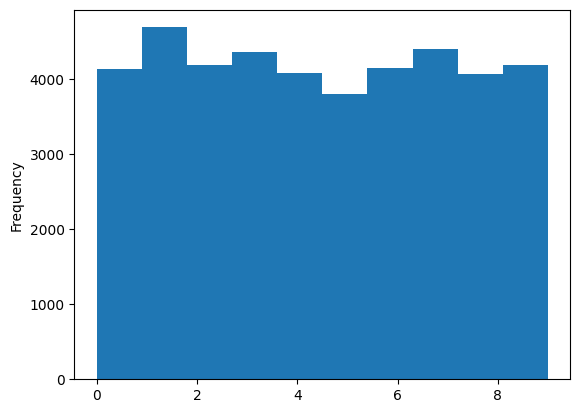

In [4]:
df['label'].plot.hist()

## Vizualize some images

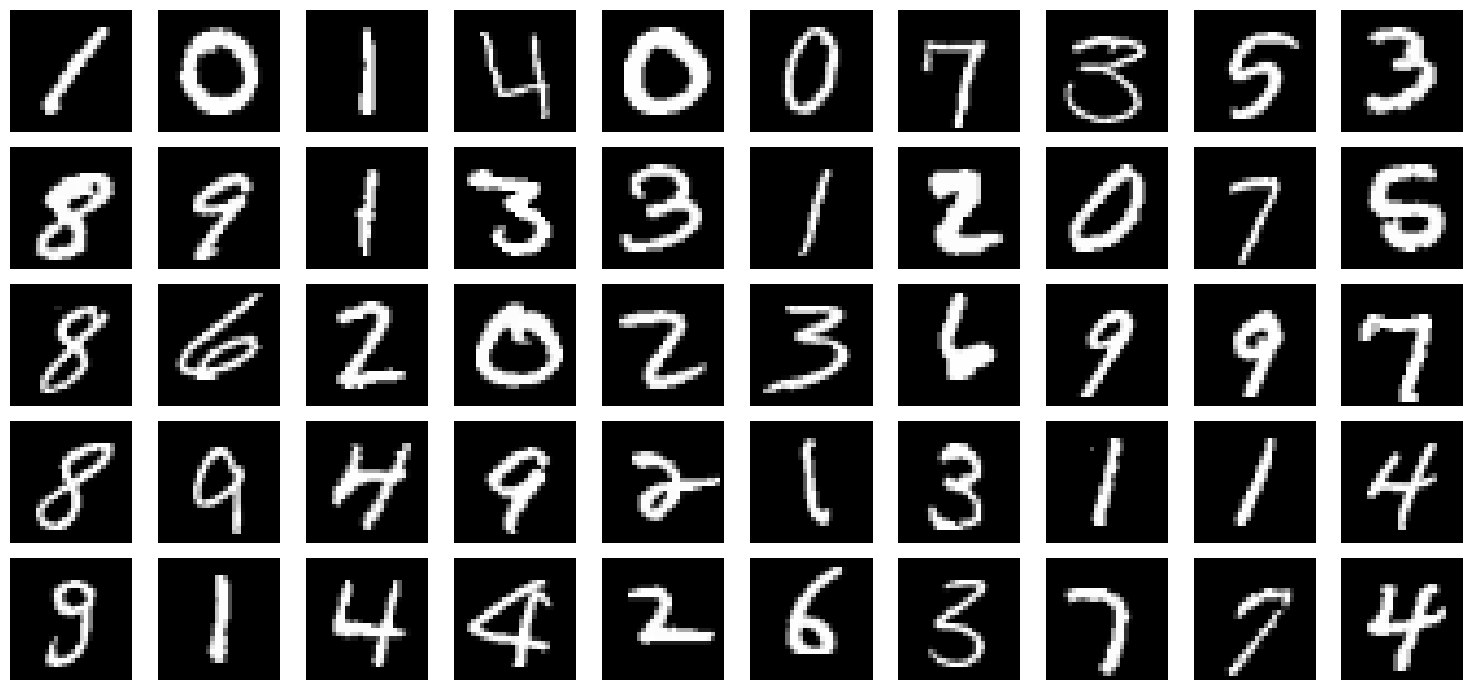

In [5]:
visualize_images = df.drop(['label'], axis=1).to_numpy().reshape(-1,28,28) / 255
# Number images display
num_images = 50

# Grid dimension
rows = 5
cols = 10

# Prepare figure
plt.figure(figsize=(15, 7))

for i, img in enumerate(visualize_images[:num_images]):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Split my dataset to train set and test set
I choose to take 80% of my data for traning and 20% for testing

In [6]:
train = pd.DataFrame()
test = pd.DataFrame()
for i in range(10):
    df_label = df[df['label'] == i]
    
    nb_train = np.round(df_label['label'].count() * .8).astype(int)
    nb_test = np.round(df_label['label'].count() * .2).astype(int)
    
    train = pd.concat([train, df_label[:nb_train]], ignore_index=True)
    test = pd.concat([test, df_label[-nb_test:]], ignore_index=True)

## Separate label and images data + normalize images 0-255 to 0-1 + reshape to 28,28 pixel image

In [7]:
train_labels = train['label']
train_images = train.drop(['label'], axis=1).to_numpy().reshape(-1,28,28) / 255
test_labels = test['label']
test_images = test.drop(['label'], axis=1).to_numpy().reshape(-1,28,28) / 255

## Train and evaluate model

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=3)
model.evaluate(test_images, test_labels)

Epoch 1/3


/Users/axelturchinim23000/Documents/dev/projects/handwritten_digit_recognization/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1051/1051 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8541 - loss: 0.5199
Epoch 2/3
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9605 - loss: 0.1302
Epoch 3/3
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.9745 - loss: 0.0814
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.9744 - loss: 0.0889


[0.09511835873126984, 0.9720205068588257]

## Save model

In [9]:
model.save('../model/handwritten.model.keras')